In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from skimage.io import imread
import random


In [2]:
# eda.ipynb is inside notebooks/
BASE_DIR = Path.cwd().parent / "15298010"

print("BASE_DIR:", BASE_DIR)
print("Exists:", BASE_DIR.exists())


BASE_DIR: c:\Users\pooji\OneDrive\Desktop\oil_spill\15298010
Exists: True


In [3]:
IMG_TRAIN = BASE_DIR / "images" / "images" / "train"
IMG_VAL   = BASE_DIR / "images" / "images" / "val"

MASK_TRAIN = BASE_DIR / "masks" / "masks" / "train"
MASK_VAL   = BASE_DIR / "masks" / "masks" / "val"

print("IMG_TRAIN exists:", IMG_TRAIN.exists())
print("MASK_TRAIN exists:", MASK_TRAIN.exists())


IMG_TRAIN exists: True
MASK_TRAIN exists: True


In [4]:
train_images = list(IMG_TRAIN.glob("*.png"))
val_images   = list(IMG_VAL.glob("*.png"))
train_masks  = list(MASK_TRAIN.glob("*.png"))
val_masks    = list(MASK_VAL.glob("*.png"))

print("Train images:", len(train_images))
print("Val images  :", len(val_images))
print("Train masks :", len(train_masks))
print("Val masks   :", len(val_masks))


Train images: 6455
Val images  : 1615
Train masks : 6455
Val masks   : 1615


In [5]:
idx = random.randint(0, len(train_images) - 1)

img = imread(train_images[idx])
mask = imread(train_masks[idx])

print("Image shape:", img.shape, img.dtype)
print("Mask shape :", mask.shape, np.unique(mask))


Image shape: (256, 256, 3) uint8
Mask shape : (256, 256) [  0 255]


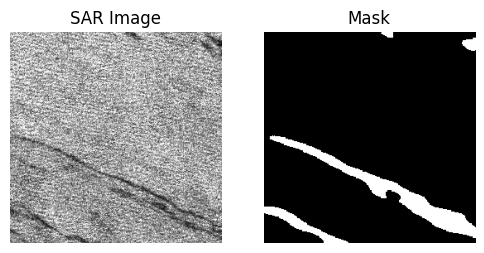

In [6]:
plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
plt.title("SAR Image")
plt.imshow(img, cmap="gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Mask")
plt.imshow(mask, cmap="gray")
plt.axis("off")

plt.show()


In [7]:
img_norm = img / 255.0
mask_norm = mask / 255.0

print("Image range:", img_norm.min(), img_norm.max())
print("Mask unique values:", np.unique(mask_norm))


Image range: 0.0 1.0
Mask unique values: [0. 1.]


Image shape: (256, 256, 3) uint8
Mask shape : (256, 256) [  0 255]


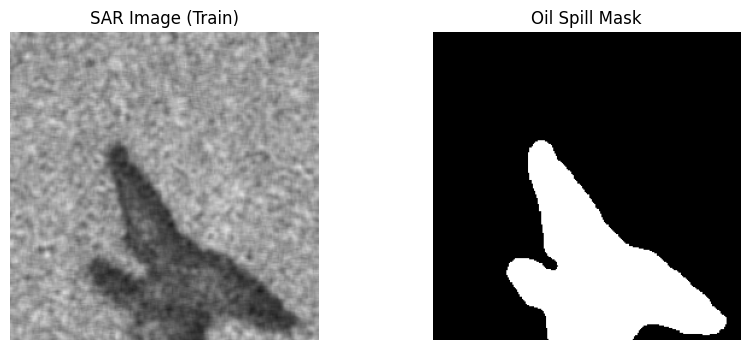

In [8]:
import random

img_files = sorted(list(IMG_TRAIN.glob("*.png")))
mask_files = sorted(list(MASK_TRAIN.glob("*.png")))

idx = random.randint(0, len(img_files)-1)

img = imread(img_files[idx])
mask = imread(mask_files[idx])

print("Image shape:", img.shape, img.dtype)
print("Mask shape :", mask.shape, np.unique(mask))

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("SAR Image (Train)")
plt.imshow(img, cmap="gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Oil Spill Mask")
plt.imshow(mask, cmap="gray")
plt.axis("off")

plt.show()


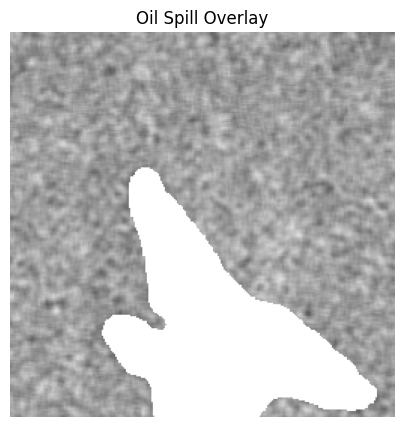

In [9]:
overlay = img.copy()
overlay[mask > 0] = 255

plt.figure(figsize=(5,5))
plt.imshow(overlay, cmap="gray")
plt.title("Oil Spill Overlay")
plt.axis("off")
plt.show()


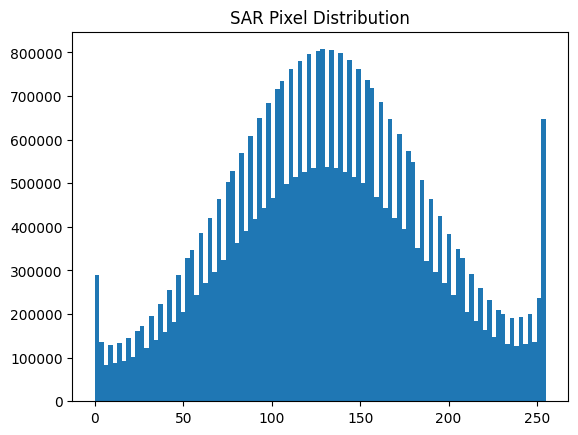

(np.uint8(0), np.uint8(255))

In [10]:
# Pixel intensity distribution (SAR)
pixels = []

for f in img_files[:200]:
    img = imread(f)
    pixels.extend(img.flatten())

pixels = np.array(pixels)

plt.hist(pixels, bins=100)
plt.title("SAR Pixel Distribution")
plt.show()

pixels.min(), pixels.max()


In [11]:
IMG_SIZE = 256

def load_image_mask(img_path, mask_path):
    # Read image (grayscale)
    img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0  # normalize
    

    # Read mask
    mask = cv2.imread(str(mask_path), cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, (IMG_SIZE, IMG_SIZE))
    mask = mask / 255.0  # convert 0/255 → 0/1

    return img, mask
